## Загрузка

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/Acoustic_Extinguisher_Fire_Dataset.csv', encoding='utf-8', sep=',')
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


## Визуализация

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.use('seaborn-v0_8')

Text(0.5, 0.98, 'Графики для второго датасета')

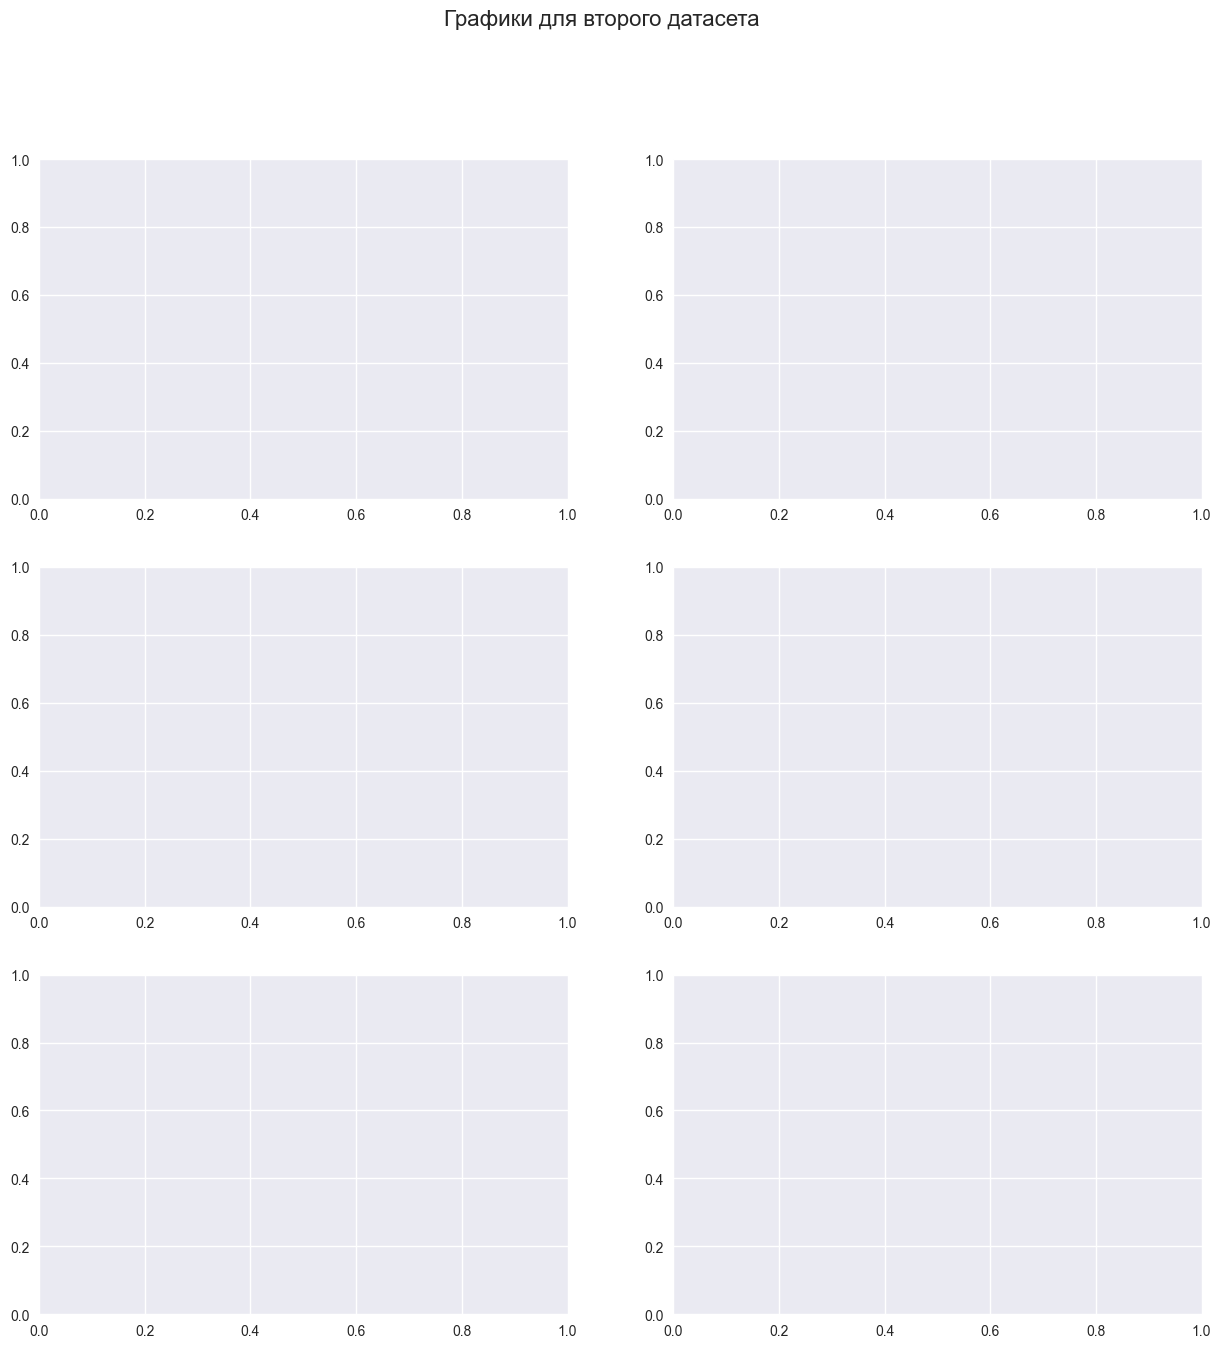

In [5]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
fig.suptitle('Графики для второго датасета', fontsize=16)

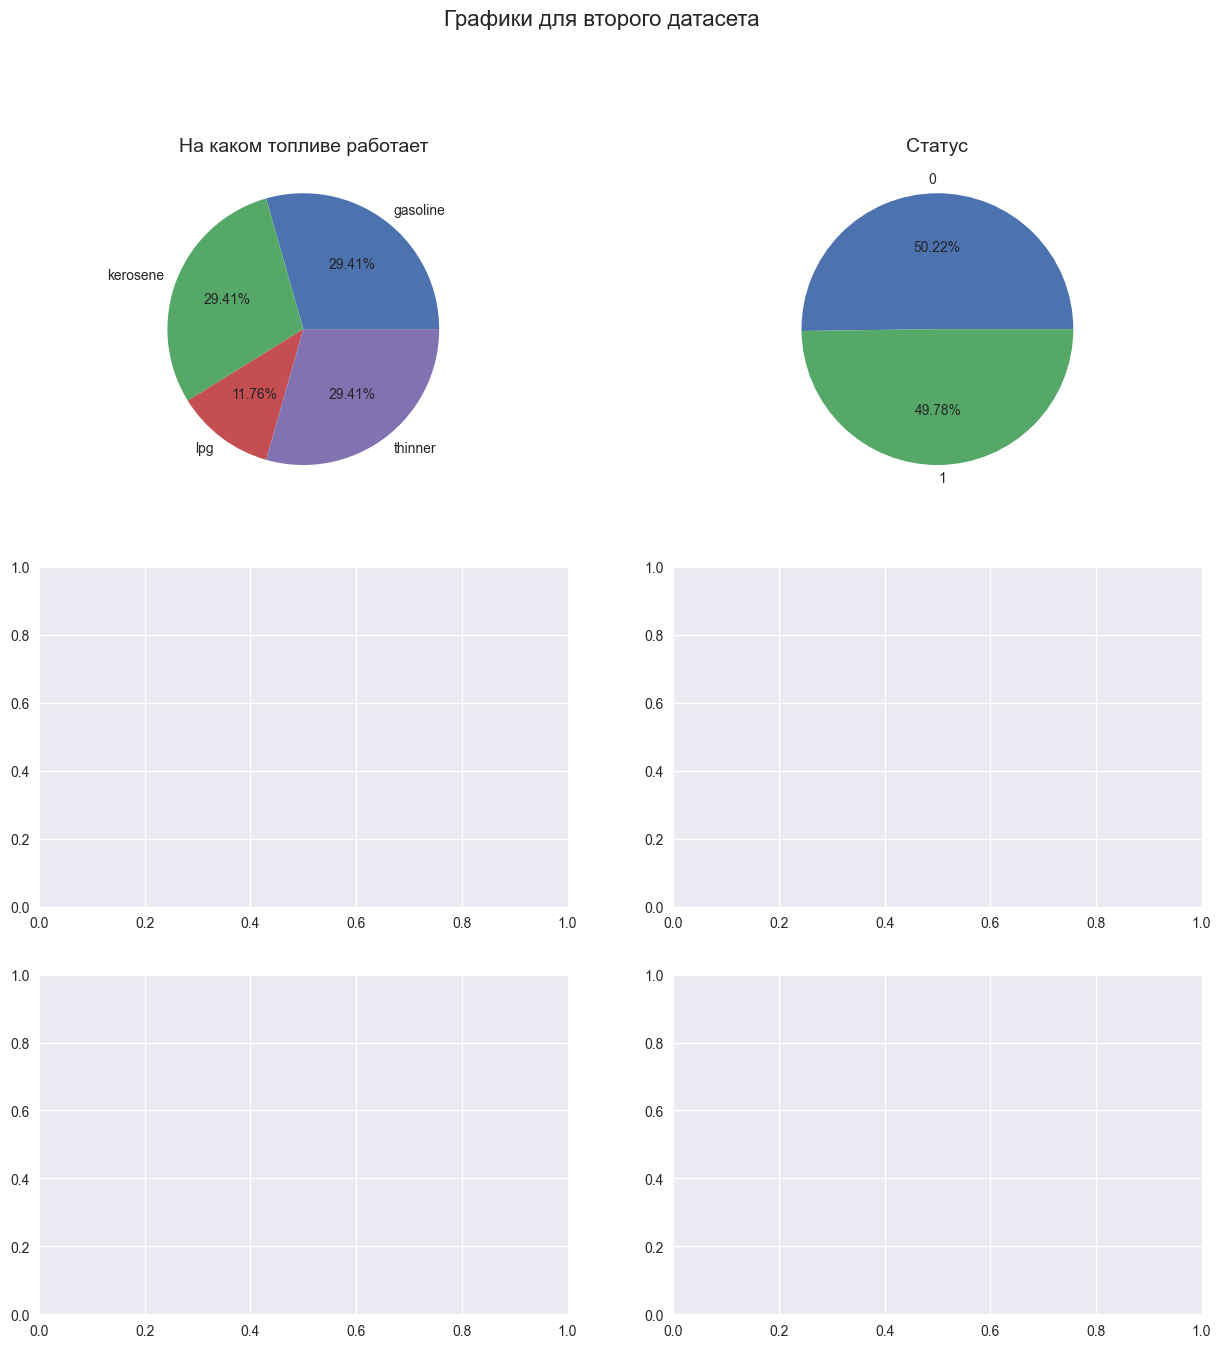

In [6]:
labels, counts = np.unique(data['FUEL'], return_counts=True)
axes[0,0].set_title('На каком топливе работает', fontsize=14)
axes[0,0].pie(counts, labels=labels, autopct='%.2f%%')

labels, counts = np.unique(data['STATUS'], return_counts=True)
axes[0,1].set_title('Статус', fontsize=14)
axes[0,1].pie(counts, labels=labels, autopct='%.2f%%')

fig

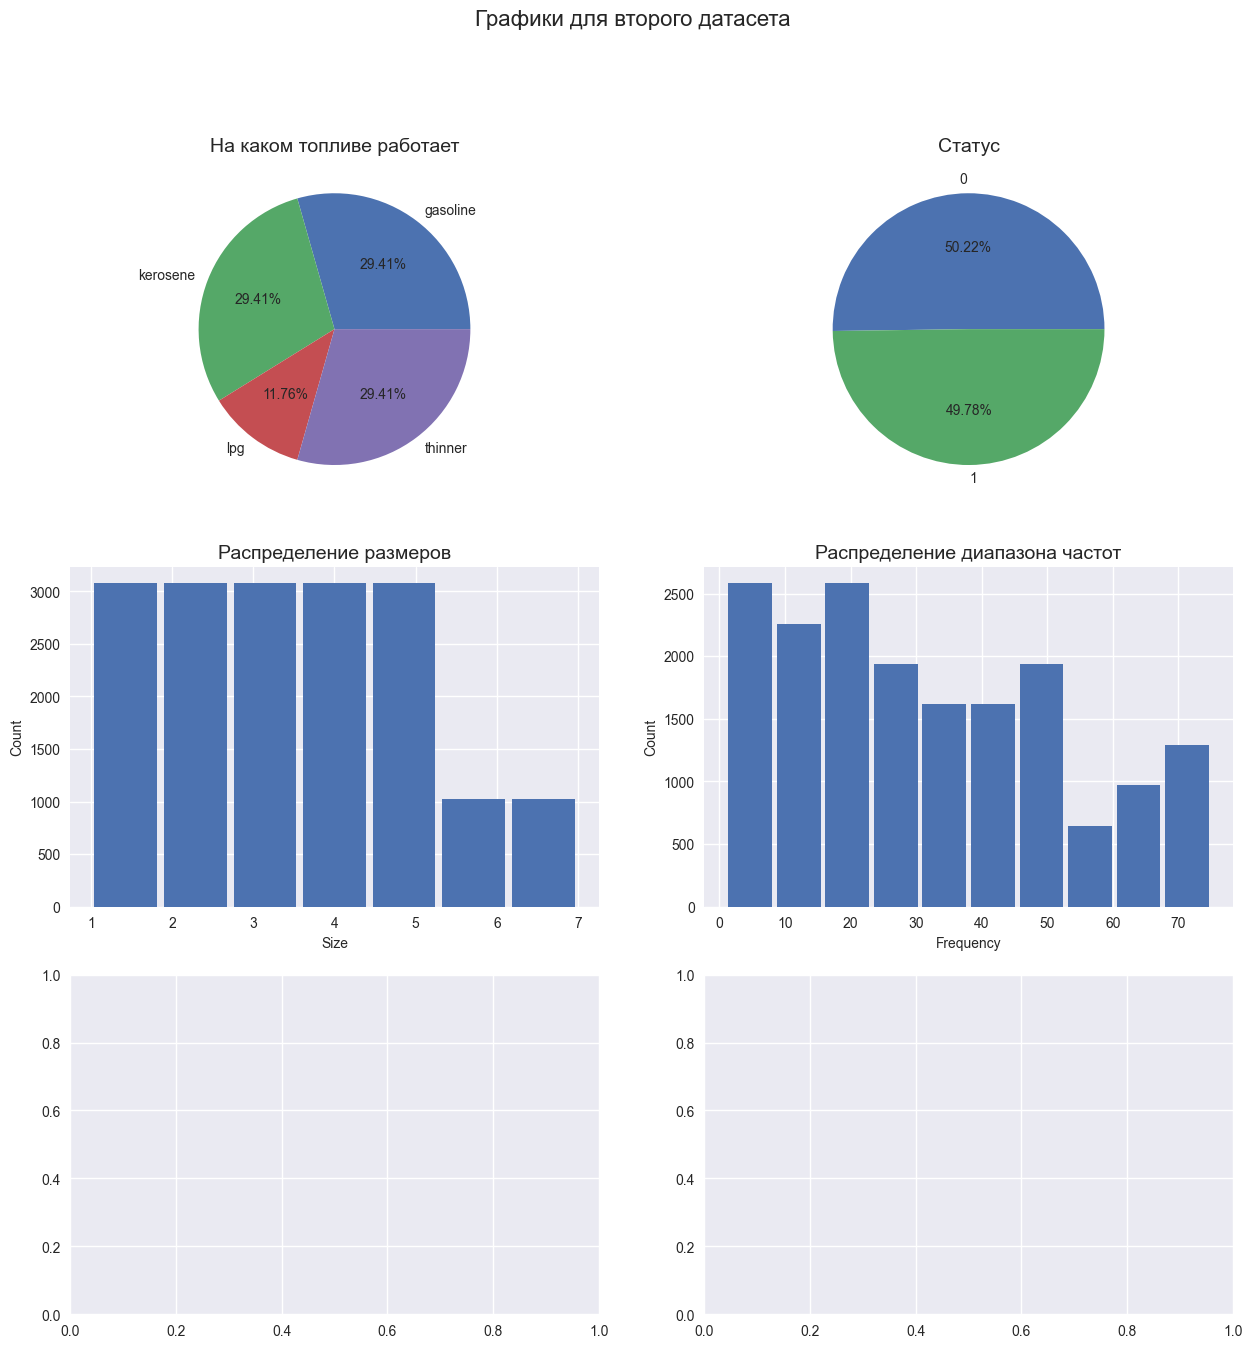

In [7]:
axes[1,0].set_title('Распределение размеров', fontsize=14)
axes[1,0].set_xlabel('Size')
axes[1,0].set_ylabel('Count')
axes[1,0].hist(data['SIZE'], rwidth=0.9, bins=7)

axes[1,1].set_title('Распределение диапазона частот', fontsize=14)
axes[1,1].set_xlabel('Frequency')
axes[1,1].set_ylabel('Count')
axes[1,1].hist(data['FREQUENCY'], rwidth=0.9)

fig

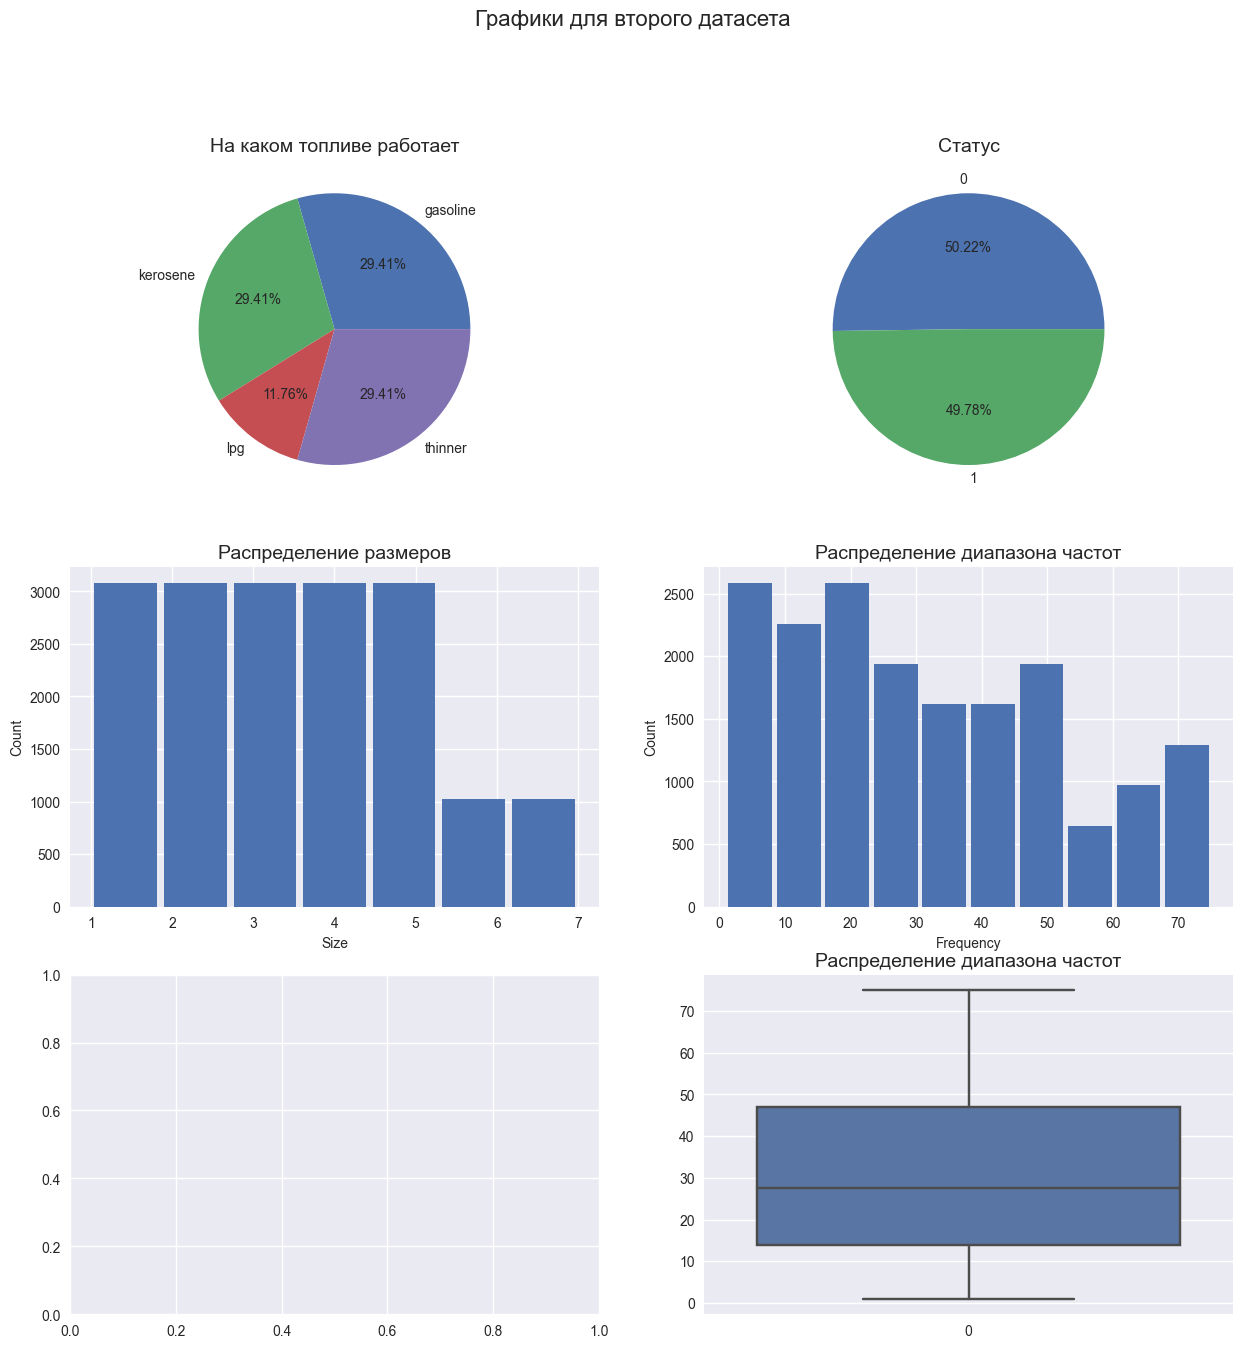

In [8]:
axes[2,1].set_title('Распределение диапазона частот', fontsize=14)
sns.boxplot(ax=axes[2,1], data=data['FREQUENCY'])
fig

C:\Users\podov\AppData\Local\Temp\ipykernel_14672\918223757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ax=axes[2,0], data=data.corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm', linecolor='black', square=True)


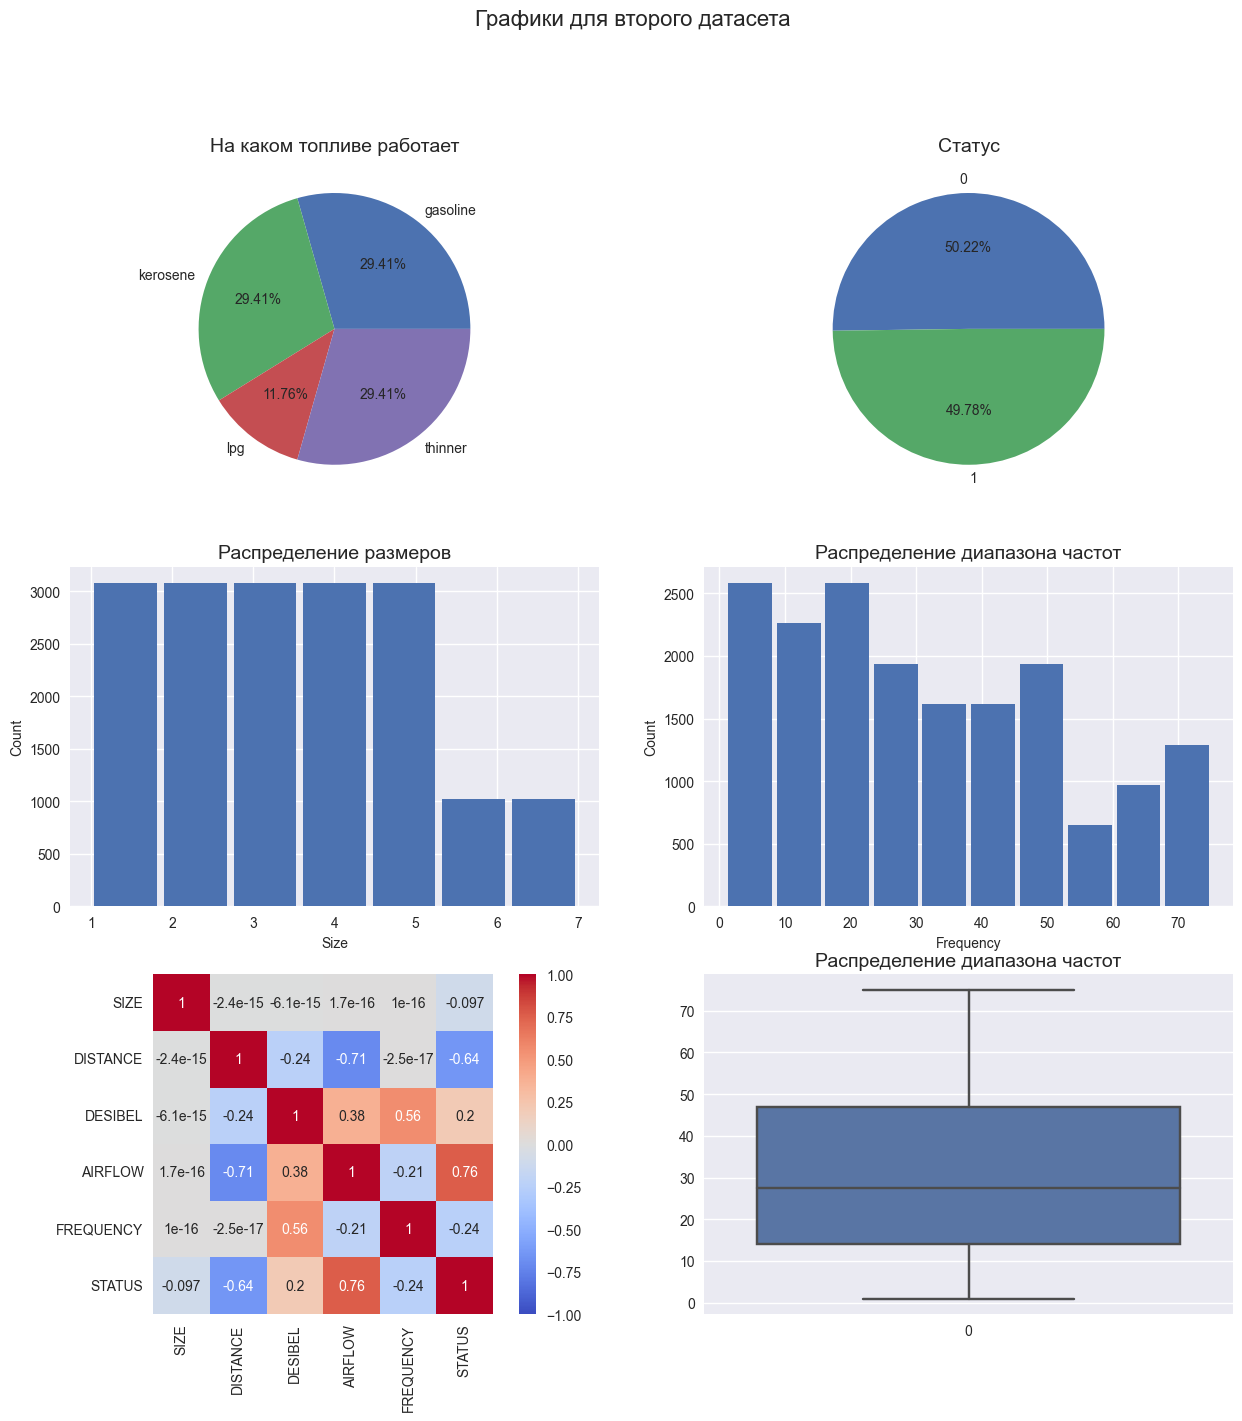

In [9]:
sns.heatmap(ax=axes[2,0], data=data.corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm', linecolor='black', square=True)
fig

## Предобработка

In [10]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [11]:
data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [13]:
data['FUEL'].value_counts(dropna=False)

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

In [14]:
data['FUEL'] = data['FUEL'].map({v: k+1 for k, v in enumerate(data['FUEL'].unique())})

In [15]:
# нормализовать

## Обучение

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [17]:
y = data['STATUS']
X = data.drop(['STATUS'], axis=1)

display(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(17442, 6)

(17442,)

In [493]:
params = {
    'n_neighbors': range(5, 12, 2),
    'leaf_size': range(25, 51, 5)
}

knn = GridSearchCV(KNeighborsClassifier(), params).fit(X_train, y_train)

In [494]:
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))
print(knn.best_params_)

[[2463  166]
 [ 269 2335]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2629
           1       0.93      0.90      0.91      2604

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233

{'leaf_size': 25, 'n_neighbors': 9}


In [456]:
params = {
    'max_iter': range(80, 121, 10)
}

lgr = GridSearchCV(LogisticRegression(), params).fit(X_train, y_train)

c:\Users\podov\Desktop\sprint7_8_ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [458]:
print(confusion_matrix(y_test, lgr.predict(X_test)))
print(classification_report(y_test, lgr.predict(X_test)))
print(lgr.best_params_)

[[2349  280]
 [ 366 2238]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2629
           1       0.89      0.86      0.87      2604

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233

{'max_iter': 90, 'tol': 0.0001}


In [439]:
params = {
    'min_samples_leaf': range(1, 11),
    'max_features': range(5, 51, 5)
}

dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), params).fit(X_train, y_train)

In [440]:
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))
print(dtc.best_params_)

[[2525  104]
 [ 116 2488]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2629
           1       0.96      0.96      0.96      2604

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233

{'max_features': 10, 'min_samples_leaf': 1}


In [444]:
params = {
    'n_estimators': range(7, 12),
    'max_features': range(1, 4)
}

bc = GridSearchCV(BaggingClassifier(random_state=42), params).fit(X_train, y_train)

In [445]:
print(confusion_matrix(y_test, bc.predict(X_test)))
print(classification_report(y_test, bc.predict(X_test)))
print(bc.best_params_)

[[2440  189]
 [ 253 2351]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2629
           1       0.93      0.90      0.91      2604

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233

{'max_features': 3, 'n_estimators': 11}


In [448]:
params = {
    'max_depth': range(3, 8),
}

gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), params).fit(X_train, y_train)

In [449]:
print(confusion_matrix(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))
print(gbc.best_params_)

[[2561   68]
 [  72 2532]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2629
           1       0.97      0.97      0.97      2604

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233

{'max_depth': 7}


In [459]:
import tensorflow as tf

In [460]:
X_train.shape

(12209, 6)

In [471]:
big_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(17, activation="elu", input_shape=(6,)),
        tf.keras.layers.Dense(13, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(7, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

big_model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy")
big_model.fit(X_train, y_train, epochs=50, verbose=True)

Epoch 1/50
382/382 [==============================] - 3s 3ms/step - loss: 0.3872
Epoch 2/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2755
Epoch 3/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2590
Epoch 4/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2400
Epoch 5/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2352
Epoch 6/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2275
Epoch 7/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2264
Epoch 8/50
382/382 [==============================] - 1s 4ms/step - loss: 0.2234
Epoch 9/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2196
Epoch 10/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2162
Epoch 11/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2179
Epoch 12/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2113
Epoch 13/50
382/382 [====

In [472]:
y_pred = big_model.predict(X_test)
display(y_pred)

y_pred = np.around(y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

164/164 [==============================] - 1s 3ms/step


array([[4.6281628e-02],
       [9.9995542e-01],
       [4.7872169e-04],
       ...,
       [6.9568068e-02],
       [6.2267944e-02],
       [3.1385776e-01]], dtype=float32)

[[2463  166]
 [ 220 2384]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2629
           1       0.93      0.92      0.93      2604

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



In [473]:
big_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(17, activation="elu", input_shape=(6,)),
        tf.keras.layers.Dense(13, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(7, activation="relu"),
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)

big_model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy")
big_model_2.fit(X_train, y_train, epochs=50, verbose=True)

Epoch 1/50
382/382 [==============================] - 3s 3ms/step - loss: 1.0468
Epoch 2/50
382/382 [==============================] - 1s 3ms/step - loss: 0.3805
Epoch 3/50
382/382 [==============================] - 1s 3ms/step - loss: 0.3244
Epoch 4/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2898
Epoch 5/50
382/382 [==============================] - 1s 4ms/step - loss: 0.2756
Epoch 6/50
382/382 [==============================] - 1s 4ms/step - loss: 0.2635
Epoch 7/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2549
Epoch 8/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2480
Epoch 9/50
382/382 [==============================] - 1s 4ms/step - loss: 0.2465
Epoch 10/50
382/382 [==============================] - 2s 4ms/step - loss: 0.2416
Epoch 11/50
382/382 [==============================] - 1s 4ms/step - loss: 0.2359
Epoch 12/50
382/382 [==============================] - 1s 3ms/step - loss: 0.2330
Epoch 13/50
382/382 [====

In [481]:
y_pred = big_model_2.predict(X_test)
display(y_pred)

y_pred = [np.argmax(pred) for pred in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

164/164 [==============================] - 1s 3ms/step


array([[9.5326263e-01, 4.6737343e-02],
       [3.6739468e-05, 9.9996328e-01],
       [9.9999583e-01, 4.1832918e-06],
       ...,
       [9.3821084e-01, 6.1789159e-02],
       [9.1199958e-01, 8.8000432e-02],
       [7.1230578e-01, 2.8769422e-01]], dtype=float32)

[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1] 

[[2461  168]
 [ 214 2390]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2629
           1       0.93      0.92      0.93      2604

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



## XGBoost ~ CatBoost

In [482]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [487]:
# напоминалка (GradientBoostingClassifier)

print(confusion_matrix(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))
print(gbc.best_params_)

[[2561   68]
 [  72 2532]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2629
           1       0.97      0.97      0.97      2604

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233

{'max_depth': 7}


In [488]:
params = {
    'max_depth': range(3, 8),
}

xgbc = GridSearchCV(XGBClassifier(random_state=42), params).fit(X_train, y_train)

In [489]:
print(confusion_matrix(y_test, xgbc.predict(X_test)))
print(classification_report(y_test, xgbc.predict(X_test)))
print(xgbc.best_params_)

[[2580   49]
 [  63 2541]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2629
           1       0.98      0.98      0.98      2604

    accuracy                           0.98      5233
   macro avg       0.98      0.98      0.98      5233
weighted avg       0.98      0.98      0.98      5233

{'max_depth': 7}


In [491]:
params = {
    'max_depth': range(3, 8, 2)
}

cbc = GridSearchCV(CatBoostClassifier(random_seed=42), params).fit(X_train, y_train)

Learning rate set to 0.027262
0:	learn: 0.6701000	total: 2.76ms	remaining: 2.75s
1:	learn: 0.6482511	total: 5.77ms	remaining: 2.88s
2:	learn: 0.6278398	total: 8.5ms	remaining: 2.82s
3:	learn: 0.6057882	total: 12.5ms	remaining: 3.12s
4:	learn: 0.5838812	total: 16.1ms	remaining: 3.19s
5:	learn: 0.5659034	total: 19.1ms	remaining: 3.17s
6:	learn: 0.5487756	total: 23.5ms	remaining: 3.33s
7:	learn: 0.5326651	total: 26.7ms	remaining: 3.31s
8:	learn: 0.5180600	total: 30ms	remaining: 3.3s
9:	learn: 0.5039427	total: 33.2ms	remaining: 3.29s
10:	learn: 0.4936822	total: 36.6ms	remaining: 3.29s
11:	learn: 0.4816303	total: 39.8ms	remaining: 3.27s
12:	learn: 0.4695904	total: 42.9ms	remaining: 3.25s
13:	learn: 0.4576441	total: 46.5ms	remaining: 3.27s
14:	learn: 0.4472997	total: 49.3ms	remaining: 3.24s
15:	learn: 0.4389243	total: 52.6ms	remaining: 3.23s
16:	learn: 0.4304151	total: 55.8ms	remaining: 3.22s
17:	learn: 0.4205965	total: 59.3ms	remaining: 3.24s
18:	learn: 0.4117942	total: 62.8ms	remaining: 3.

In [492]:
print(confusion_matrix(y_test, cbc.predict(X_test)))
print(classification_report(y_test, cbc.predict(X_test)))
print(cbc.best_params_)

[[2567   62]
 [  62 2542]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2629
           1       0.98      0.98      0.98      2604

    accuracy                           0.98      5233
   macro avg       0.98      0.98      0.98      5233
weighted avg       0.98      0.98      0.98      5233

{'max_depth': 7}


## Свой KNN

In [18]:
import sys
import os
from pathlib import Path

if (dir := str(Path(os.getcwd()).parent)) not in sys.path:
    sys.path.append(dir)
sys.path

['c:\\Users\\podov\\Desktop\\sprint7_8_ML\\notebooks',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'C:\\Users\\podov\\AppData\\Local\\Programs\\Python\\Python39',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML\\venv',
 '',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML\\venv\\lib\\site-packages',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML\\venv\\lib\\site-packages\\win32',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML\\venv\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML\\venv\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\podov\\Desktop\\sprint7_8_ML']

In [19]:
from mylib.knn import KnnClassifier

In [20]:
X_test.shape

(5233, 6)

15m 30s

In [31]:
my_knn = KnnClassifier(n_neighbors=5)
my_knn.fit(X_train, y_train)
my_pred = my_knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, my_pred))
print(classification_report(y_test, my_pred))

[[2450  136]
 [ 229 2418]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2586
           1       0.95      0.91      0.93      2647

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



Было в библиотечном KNN:

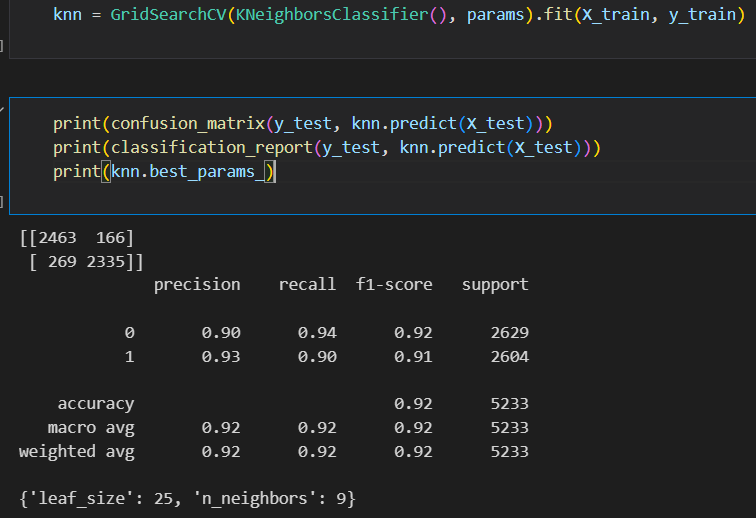